In [1]:
#%pip install numpy
#%pip install pandas
#%pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

The relevant data set is collected in the subfolder "data". Note, that the data itself is not part of the repository and should be downloaded from  https://survey.stackoverflow.co/

In [42]:
df = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_public.csv')
#df.head()


I was curious to see, where the developer are located and whether we can see differences in the usage of AI Tools

In [ ]:
set_restricted_countries = df['Country'].value_counts().head(10).index.tolist()
df_restricted_countries = df.loc[df['Country'].isin(set_restricted_countries)]
print('reduced data set: ', len(df_restricted_countries))

In [53]:
df['AISelect'].value_counts()
#nan-Werte entfernen
df['AIUsage'] = 0
df.loc[df['AISelect']=='Yes','AIUsage']=1
test = df[['Country','AIUsage']].groupby('Country')['AIUsage'].mean().reset_index()
#test.head(10)
df_restricted_countries_AI=test.loc[test['Country'].isin(set_restricted_countries)]
df_restricted_countries_AI.head(10)

,Country,AIUsage
23,Brazil,0.656000
30,Canada,0.576521
58,France,0.537915
61,Germany,0.566808
73,India,0.668164
117,Netherlands,0.599034
133,Poland,0.625163
173,Ukraine,0.722305
175,United Kingdom of Great Britain and Northern I...,0.504653
177,United States of America,0.537900


In [1]:
#%pip install geopandas


   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
   - -------------------------------------- 0.8/15.9 MB 4.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/15.9 MB 5.0 MB/s eta 0:00:03
   ----- ---------------------------------- 2.4/15.9 MB 4.3 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/15.9 MB 4.5 MB/s eta 0:00:03
   ----------- ---------------------------- 4.5/15.9 MB 4.5 MB/s eta 0:00:03
   ------------- -------------------------- 5.5/15.9 MB 4.5 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/15.9 MB 4.6 MB/s eta 0:00:03
   ------------------- -------------------- 7.6/15.9 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 8.7/15.9 MB 4.7 MB/s eta 0:00:02
   ------------------------ --------------- 9.7/15.9 MB 4.8 MB/s eta 0:00:02
   --------------------------- ------------ 10.7/15.9 MB 4.8 MB/s eta 0:00:02
   ----------------------------- ---------- 11.5/15.9 MB 4.8 MB/s eta 0:00:01
   

United Kingdom of Great Britain and Northern Ireland is not in geopandas column


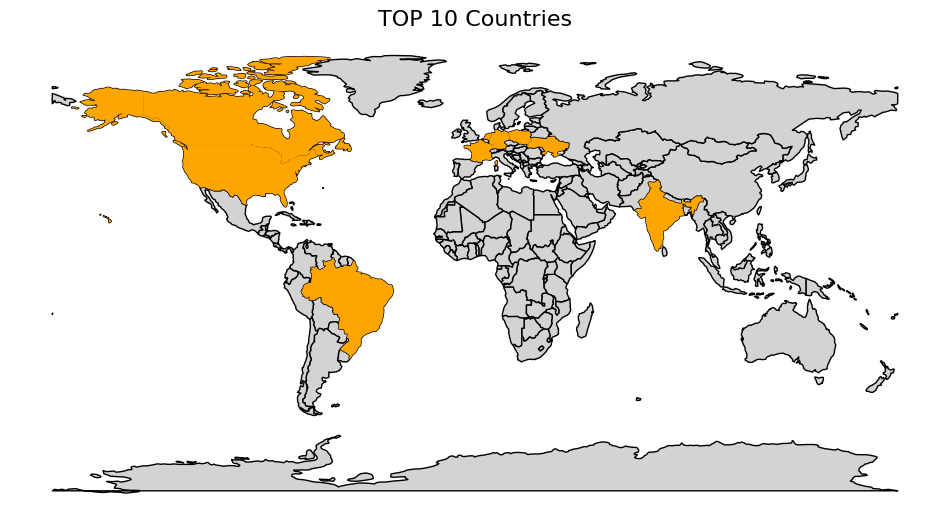

In [41]:


# Laden der Weltkarte
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
#url = 'https://cdn.jsdelivr.net/npm/world-atlas@2/countries-110m.json'
world = gpd.read_file(url)

set_country_geopandas = set(world['name'])
world['meets_criteria'] = False

for i in set_restricted_countries:
    if i in set_country_geopandas:
        world.loc[world['name']==i,'meets_criteria'] = True #['meets_criteria'] = world['name'].str.startswith('A')   
    else:
        print(i,'is not in geopandas column')

# world['meets_criteria'].value_counts()
# Plot der Weltkarte
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')  # Alle Länder in Grau darstellen
world[world['meets_criteria']].plot(ax=ax, color='orange')  # Länder, die das Kriterium erfüllen, in Orange

# Titel und Achsen anpassen
ax.set_title('TOP 10 Countries', fontsize=16)
ax.axis('off')

# Plot anzeigen
plt.show()